In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [6]:
df_learn = pd.read_csv("../experiments/randman/df_learn.csv")
df_runtime = pd.read_csv("../experiments/randman/df_runtime.csv")

In [7]:
df_learn.head()

,Epoch,Sim ID,Accuracy,Loss,Model,Method,Spike Threshold,N Hidden,Feedback Weight Alignment,Self-Prediction Forward Weight Alignment,Self-Prediction Backward Weight Alignment,Self-Prediction Bias Alignment
0,0.000000,0,0.097098,0.465020,Spike,Feedback Align,0.00001,100,NaN,NaN,NaN,NaN
1,0.789474,0,0.097098,0.356992,Spike,Feedback Align,0.00001,100,NaN,NaN,NaN,NaN
2,1.578947,0,0.098214,0.279513,Spike,Feedback Align,0.00001,100,NaN,NaN,NaN,NaN
3,2.368421,0,0.100446,0.205826,Spike,Feedback Align,0.00001,100,NaN,NaN,NaN,NaN
4,3.157895,0,0.095982,0.133865,Spike,Feedback Align,0.00001,100,NaN,NaN,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


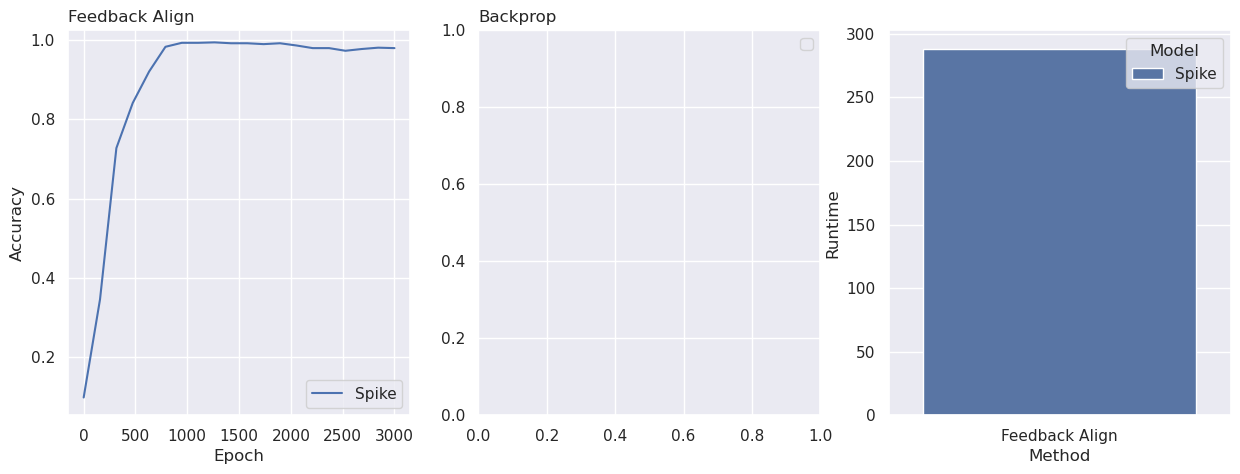

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

#sns.lineplot((df_learn[(df_learn["Method"] == "Random Feedback") * (df_learn["Model"] == "Spike")]),
#             x="Epoch", y="Accuracy", hue="Sim ID", ax=ax[0])#, units="Sim ID", estimator=None)

sns.lineplot(df_learn[df_learn["Method"] == "Feedback Align"],
             x="Epoch", y="Accuracy", hue="Model", ax=ax[0])#, units="Sim ID", estimator=None)

ax[0].legend()
ax[0].set_title("Feedback Align", loc="left")
ax[0].set_ylim(top=1.025)

sns.lineplot(df_learn[df_learn["Method"] == "Backprop"],
             x="Epoch", y="Accuracy", hue="Model", ax=ax[1])#, units="Sim ID", estimator=None)

ax[1].legend()
ax[1].set_title("Backprop", loc="left")
#ax[1].set_ylim(bottom=0.8, top=1.025)

sns.barplot(data=df_runtime, x="Method",
            hue="Model", y="Runtime", ax=ax[2])

plt.show()

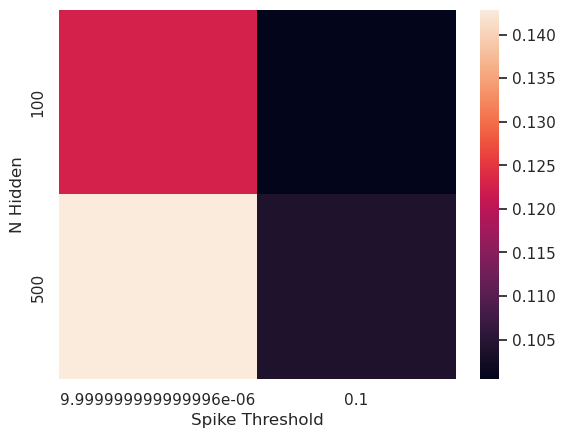

In [19]:
fig, ax = plt.subplots(1,1)

df_fin_fb_aln_spike = df_learn[(df_learn["Method"]=="Feedback Align") & (df_learn["Epoch"] == 15)
                         & (df_learn["Model"] == "Spike")]



#sns.scatterplot(df_learn[(df_learn["Method"]=="Feedback Align") & (df_learn["Epoch"] == 15)
#                         & (df_learn["Model"] == "Spike")],
#               x="Spike Threshold", y="N Hidden", hue="Accuracy", ax=ax)

sns.heatmap(df_fin_fb_aln_spike.pivot_table(index="N Hidden", columns="Spike Threshold", values="Accuracy", aggfunc="mean"), ax=ax)

#ax.set_xscale("log")

plt.show()

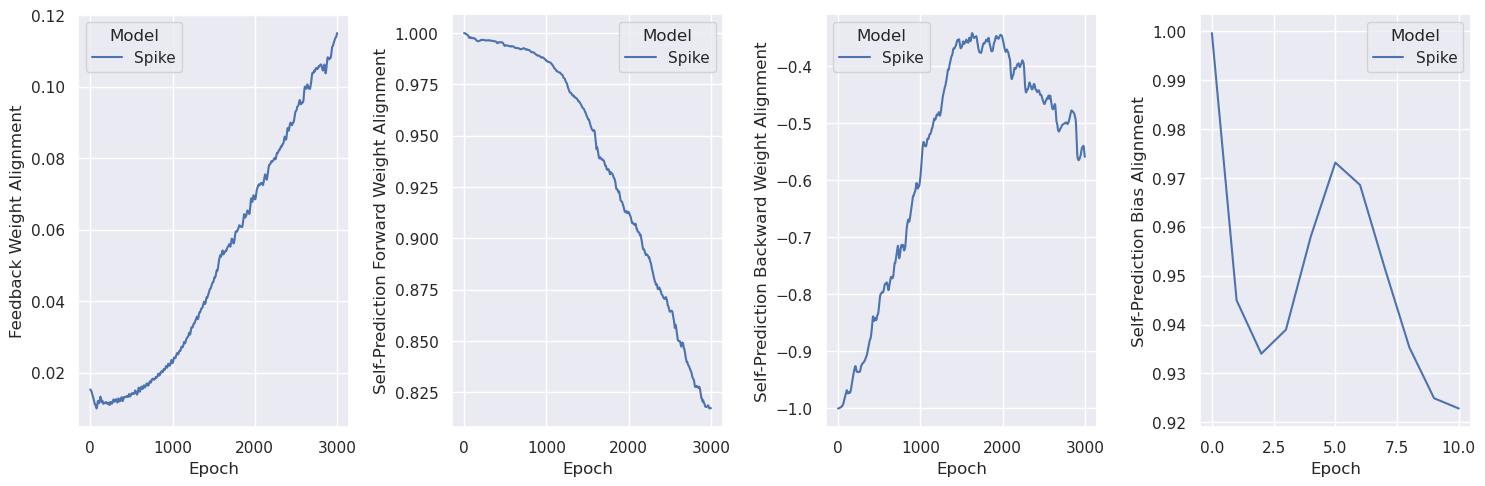

In [32]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

sns.lineplot(df_learn[df_learn["Method"] == "Feedback Align"],
             x="Epoch", y="Feedback Weight Alignment", hue="Model", ax=ax[0])

sns.lineplot(df_learn[df_learn["Method"] == "Feedback Align"],
             x="Epoch", y="Self-Prediction Forward Weight Alignment", hue="Model", ax=ax[1])

sns.lineplot(df_learn[df_learn["Method"] == "Feedback Align"],
             x="Epoch", y="Self-Prediction Backward Weight Alignment", hue="Model", ax=ax[2])

sns.lineplot(df_learn[(df_learn["Method"] == "Feedback Align") & (df_learn["Epoch"] <= 10)],
             x="Epoch", y="Self-Prediction Bias Alignment", hue="Model", ax=ax[3])

fig.tight_layout(pad=1.0)

plt.show()